## Transformer
트랜스포머는 기본적으로 시퀀셜 데이터를 다루는 모델이다.<br>
트랜스포머는 attention이라고 불리우는 구조를 활용한 첫번째 모델이다.<br>

<br>
<div>
    <img src=attachment:image.png width=800>
</div>
<br>
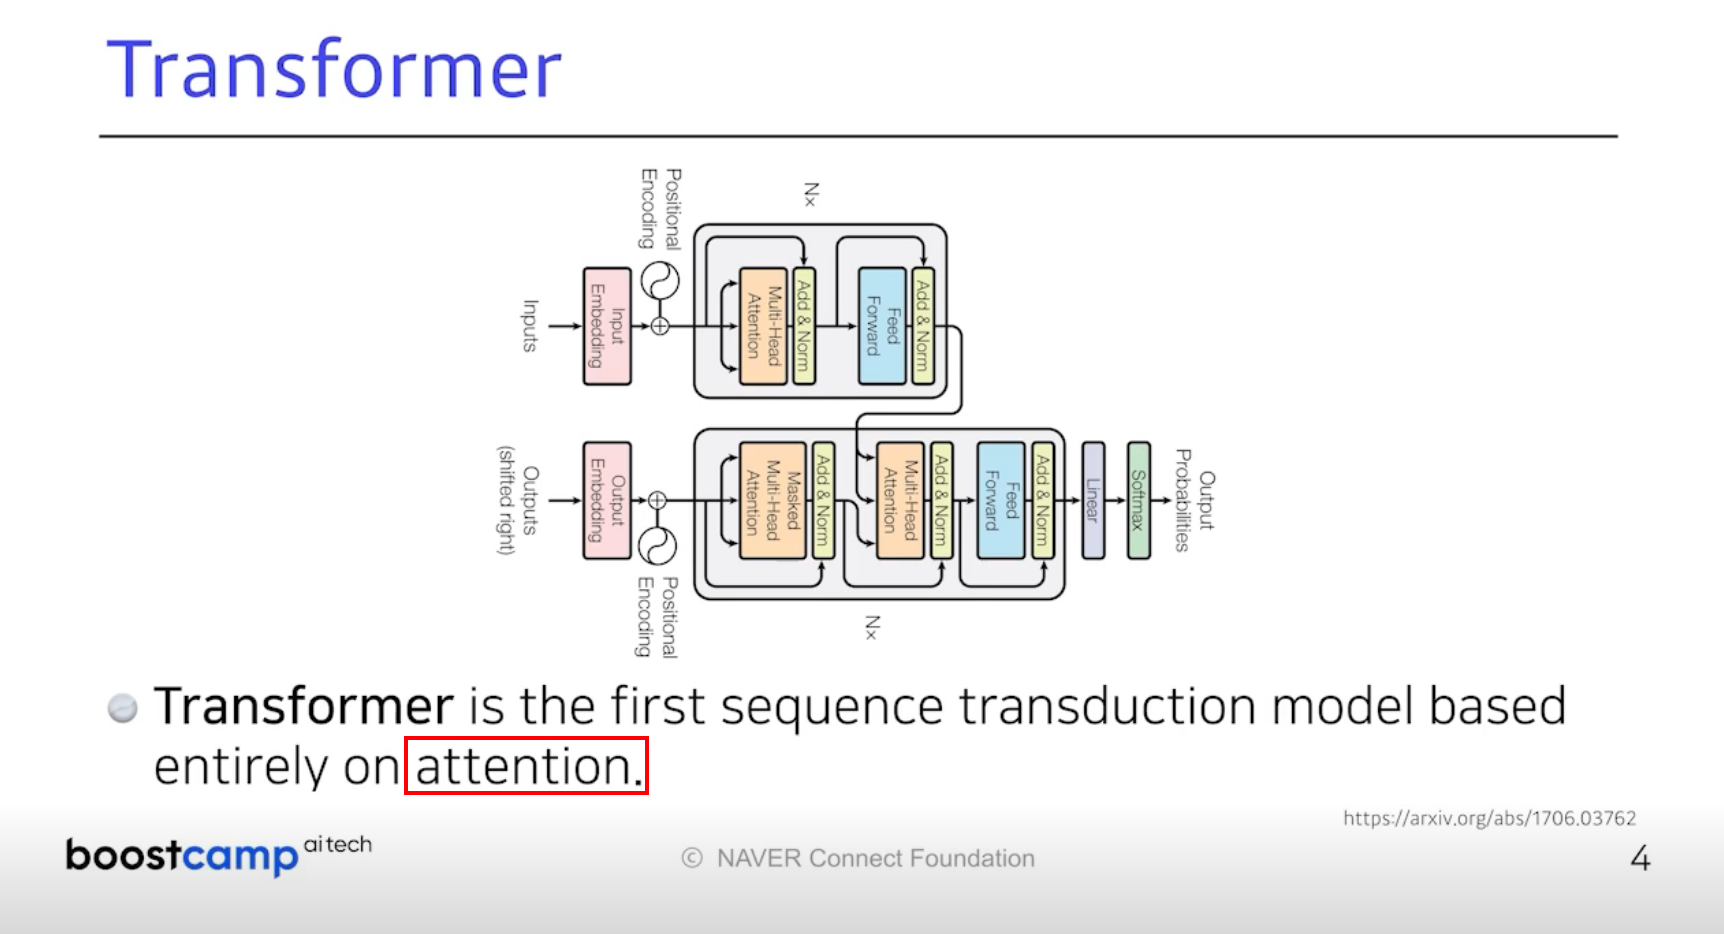

### Transformer의 목적
결국 하려고 하는것은 불어가 주어졌을 때, 이를 영어로 바꾸는 것과 같은 문제<br>
즉, Sequence가 주어지고, 이를 다른 Sequence로 바꾸는 것.<br>

<br>
<div>
    <img src=attachment:image.png width=800>
</div>
<br>

이 때, 핵심적으로 봐야할 3가지 관점이 있다.<br>

1. 어떻게 n개의 단어를 Encoder가 한번에 처리하는지
2. 인코더와 디코더사이에 어떤 정보를 주고 받는지
3. 디코더가 어떻게 Sequence를 생성하는지 (이 강의에서 이부분은 시간상 덜 다룬다.)
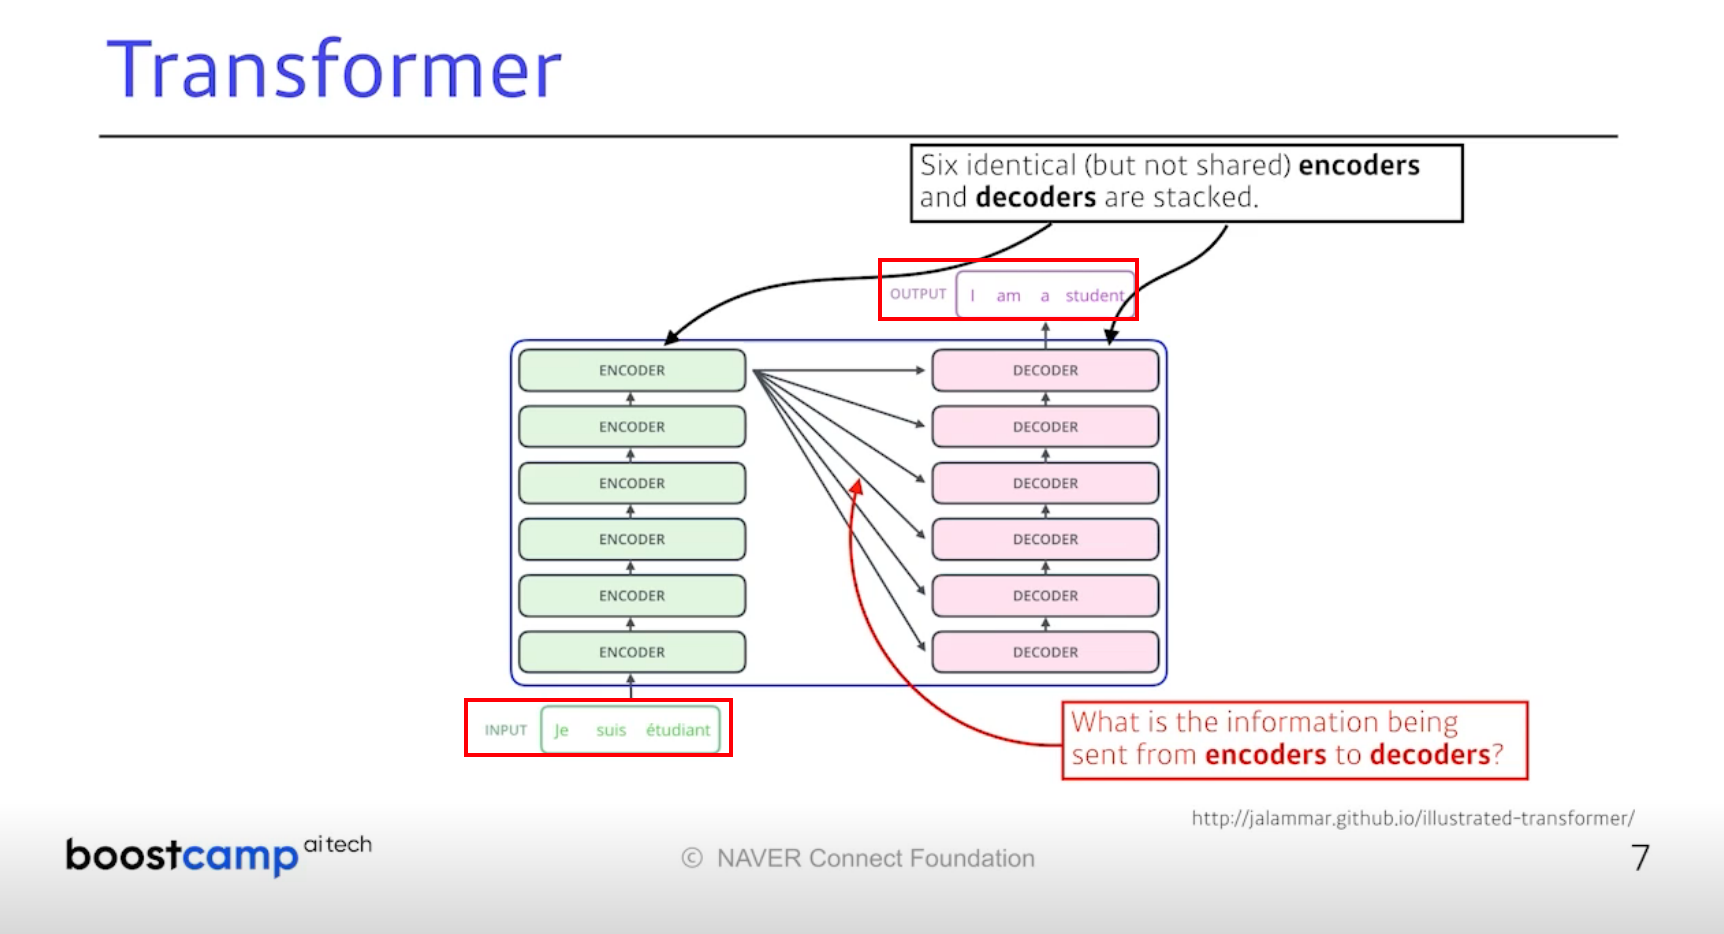

### Encoder가 어떻게 n개의 단어를 한번에 처리하는지
단어가 벡터로 들어간다.<br>
각 인코더는 Self-Attention과 Feed Forward Neural Network로 이루어져 있다.<br>

1. Self-Attention: 핵심 아이디어이다. n개의 벡터에 대해 n개의 벡터를 출력하는데, 핵심은 각각 벡터를 변환할 때 나머지 벡터들을 모두 고려한다는 점이다. 예를 들어 x1을 z1으로 변환할 때, x2, x3도 고려한다는 것이다.
2. Feed Forward: 이건 그냥 뉴럴 네트워크이고, 따로 디펜던시도 없다.

<br>
<div>
    <img src=attachment:image-2.png width=800>
</div>
<br>
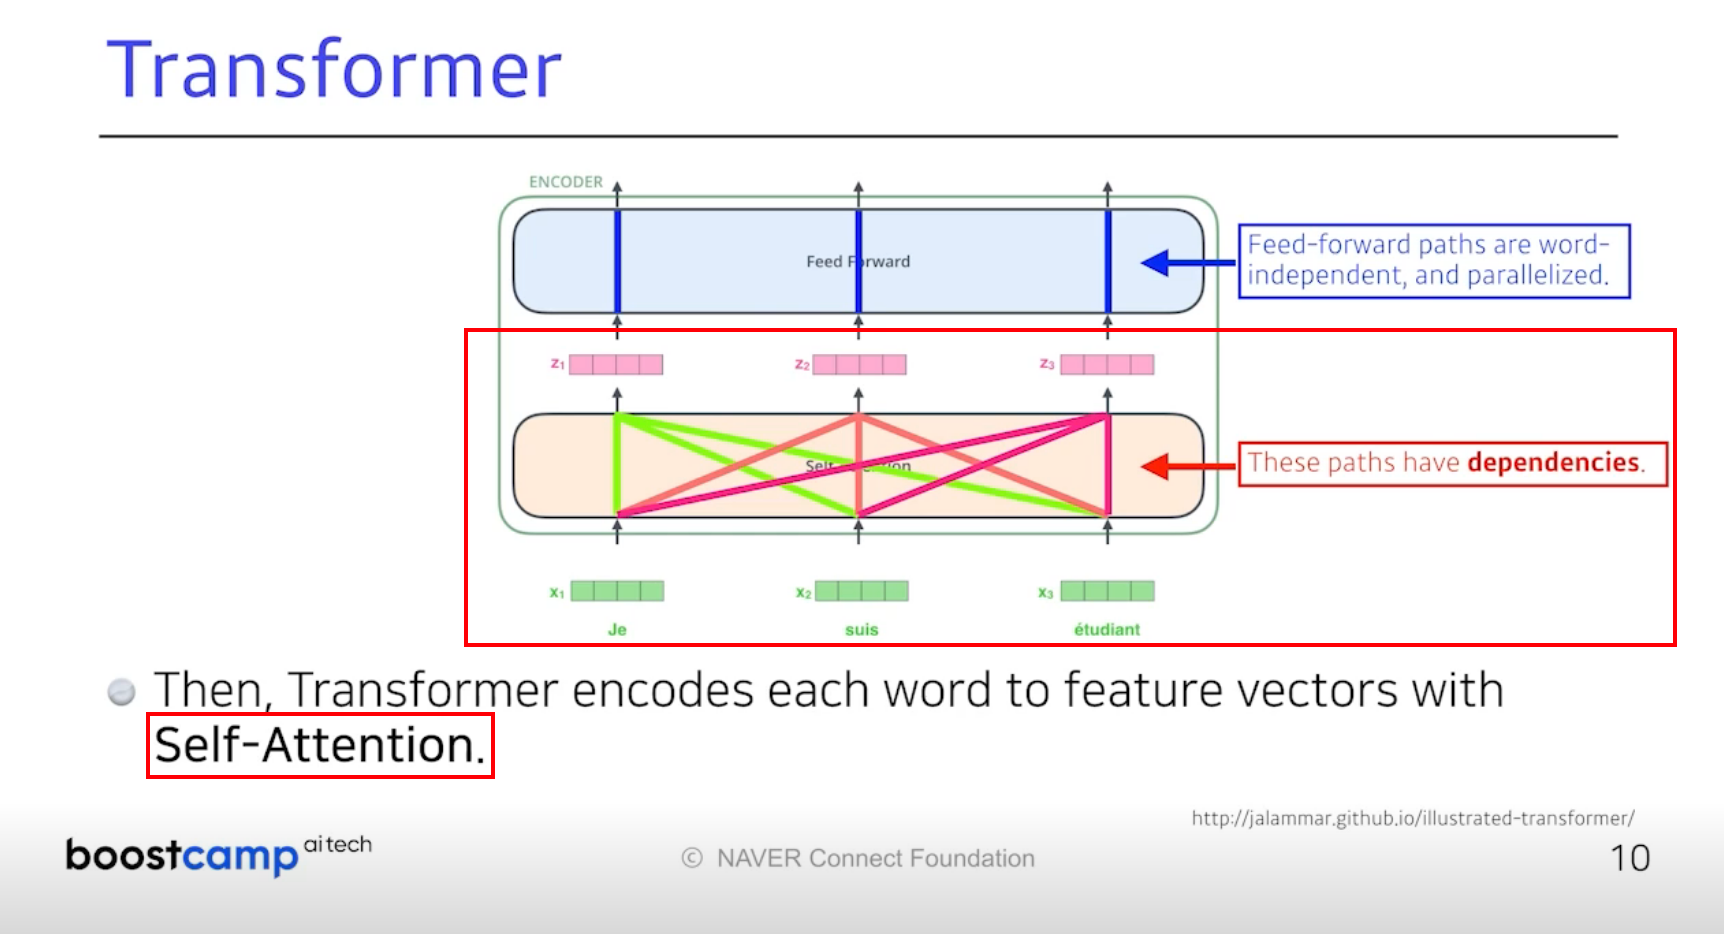

### Self-Attention의 이해
한 단어에 대해, 그 문장속의 다른 단어들과의 관계성을 보게된다.<br>
예를 들어, The animal didn't cross the street because **it** was too tired. 라는 문장이 있을때,<br>
it이 가리키는게 animal이라는것을 알수 있게 된다.<br>

<br>
<div>
    <img src=attachment:image.png width=800>
</div>
<br>
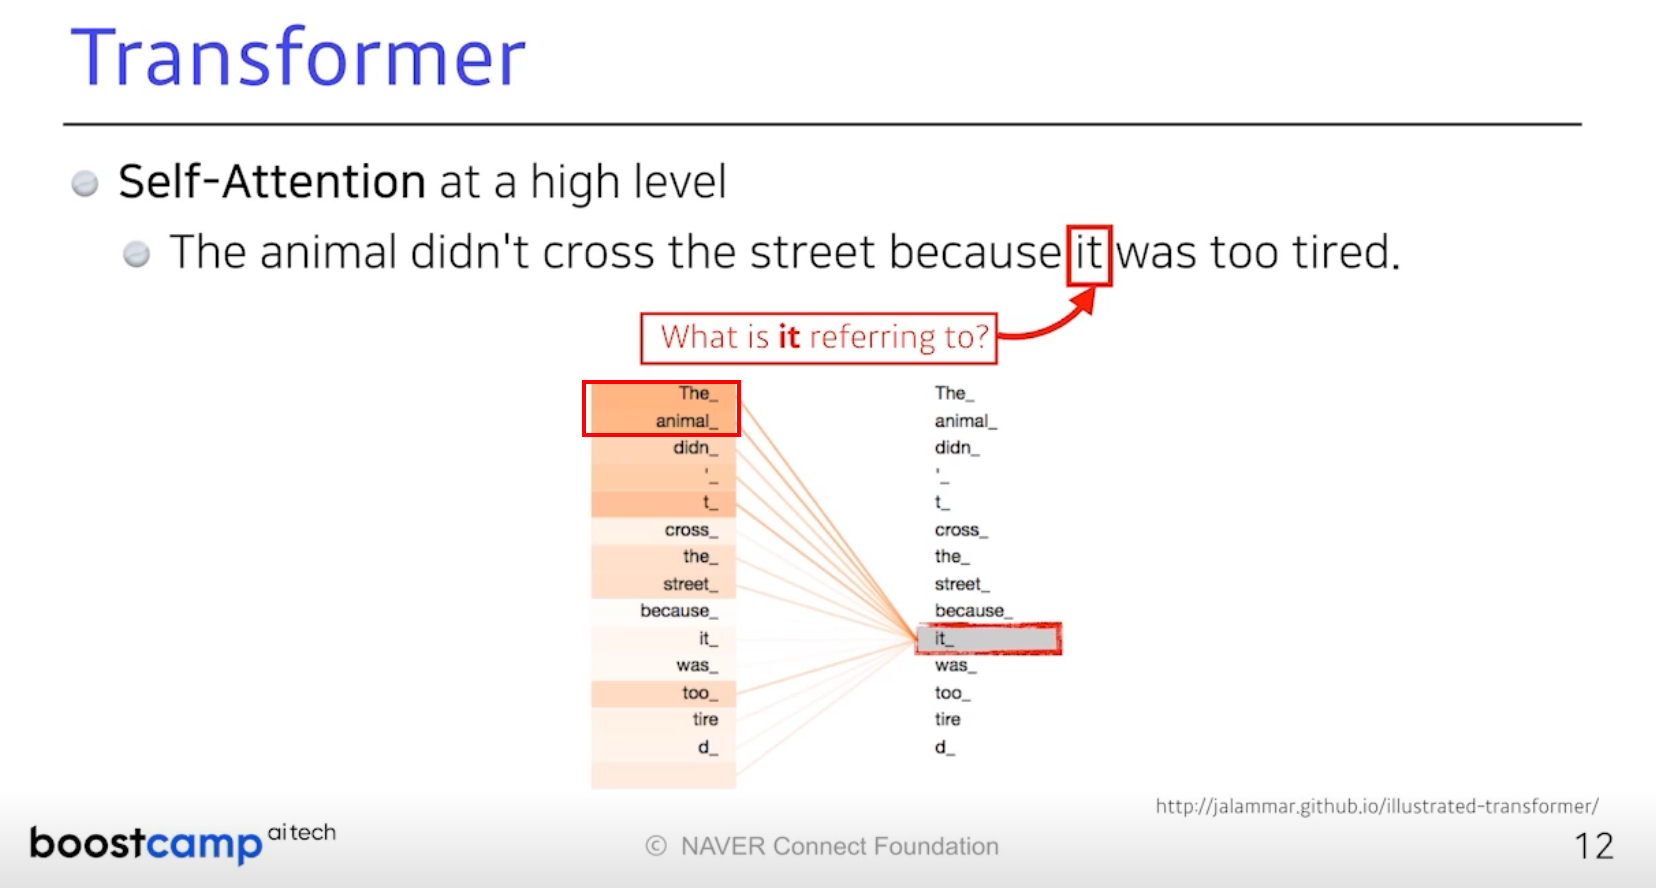

#### Query, Key, Value
기본적으로 Self-Attetion 구조는 3가지 벡터 Queries, Keys, Values를 만들게된다.<br>
주어진 문장에서 각 단어별로 이 3가지 벡터를 만들게 되고, 3개의 벡터의 연산을 통해 Encoding 된다.<br>
<br>
<div>
    <img src=attachment:image.png width=800>
</div>
<br>
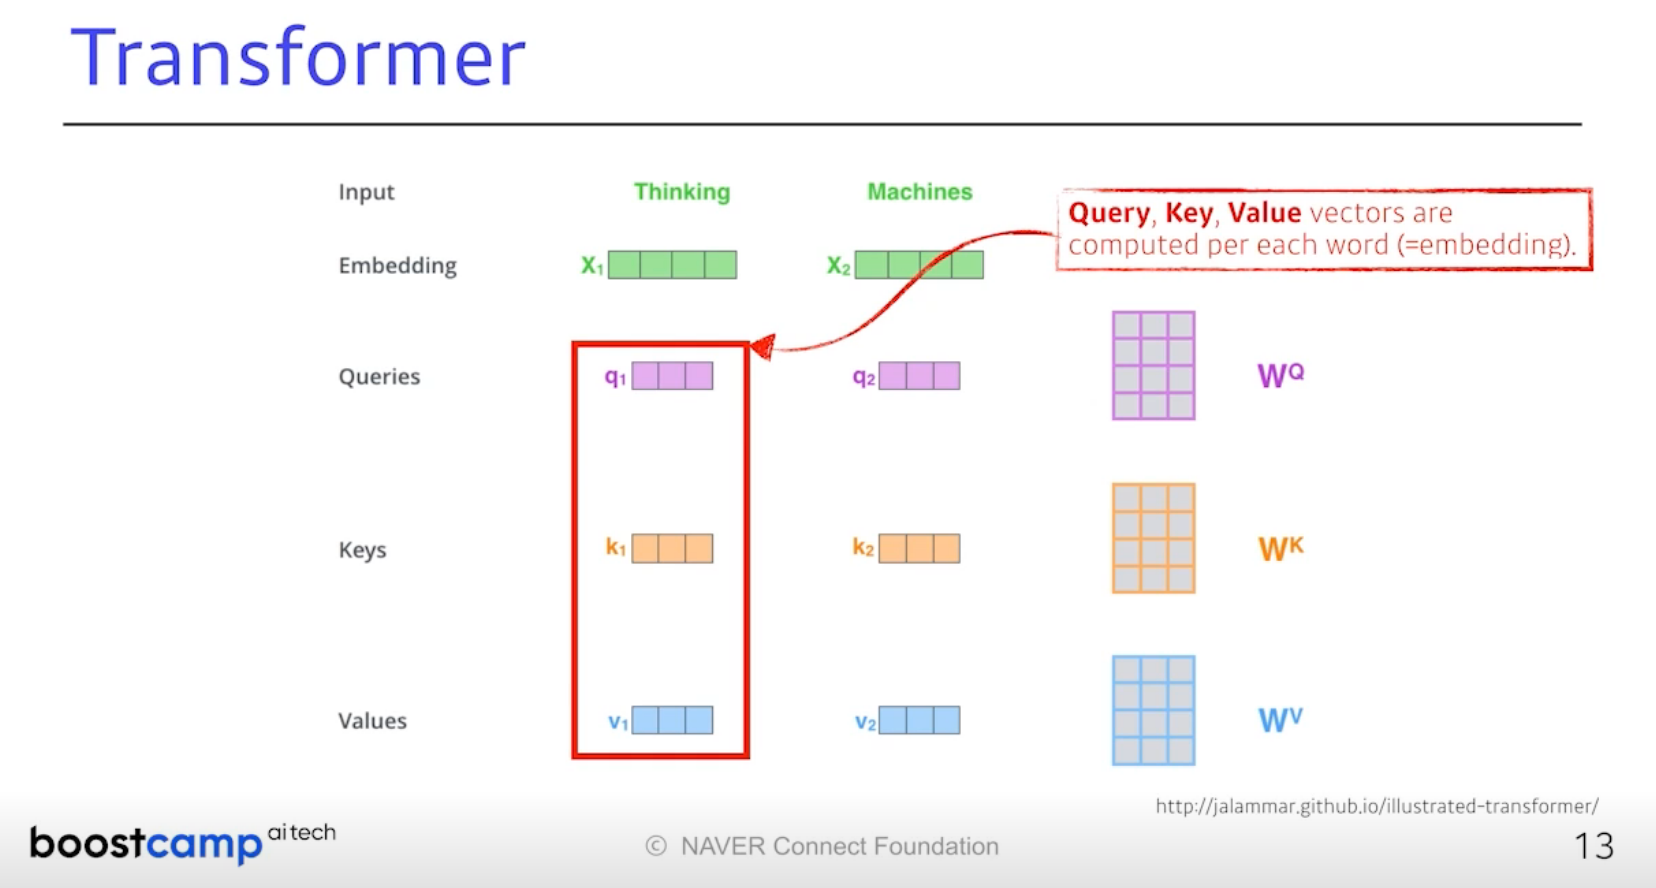

#### Encoding 연산 과정1
1. Q(Quries)벡터와 K(Keys) 벡터간 내적

<br>
<div>
    <img src=attachment:image.png width=800>
</div>
<br>

2. 루트 dk로 나눠 정규화 해주고, Softmax함수 취해준다

<br>
<div>
    <img src=attachment:image-2.png width=800>
</div>
<br>

3. Softmax 결과와 V 벡터(Value)의 가중합(Weighted Sum)해서 최종결과 z벡터 생성

<br>
<div>
    <img src=attachment:image-2.png width=800>
</div>
<br>
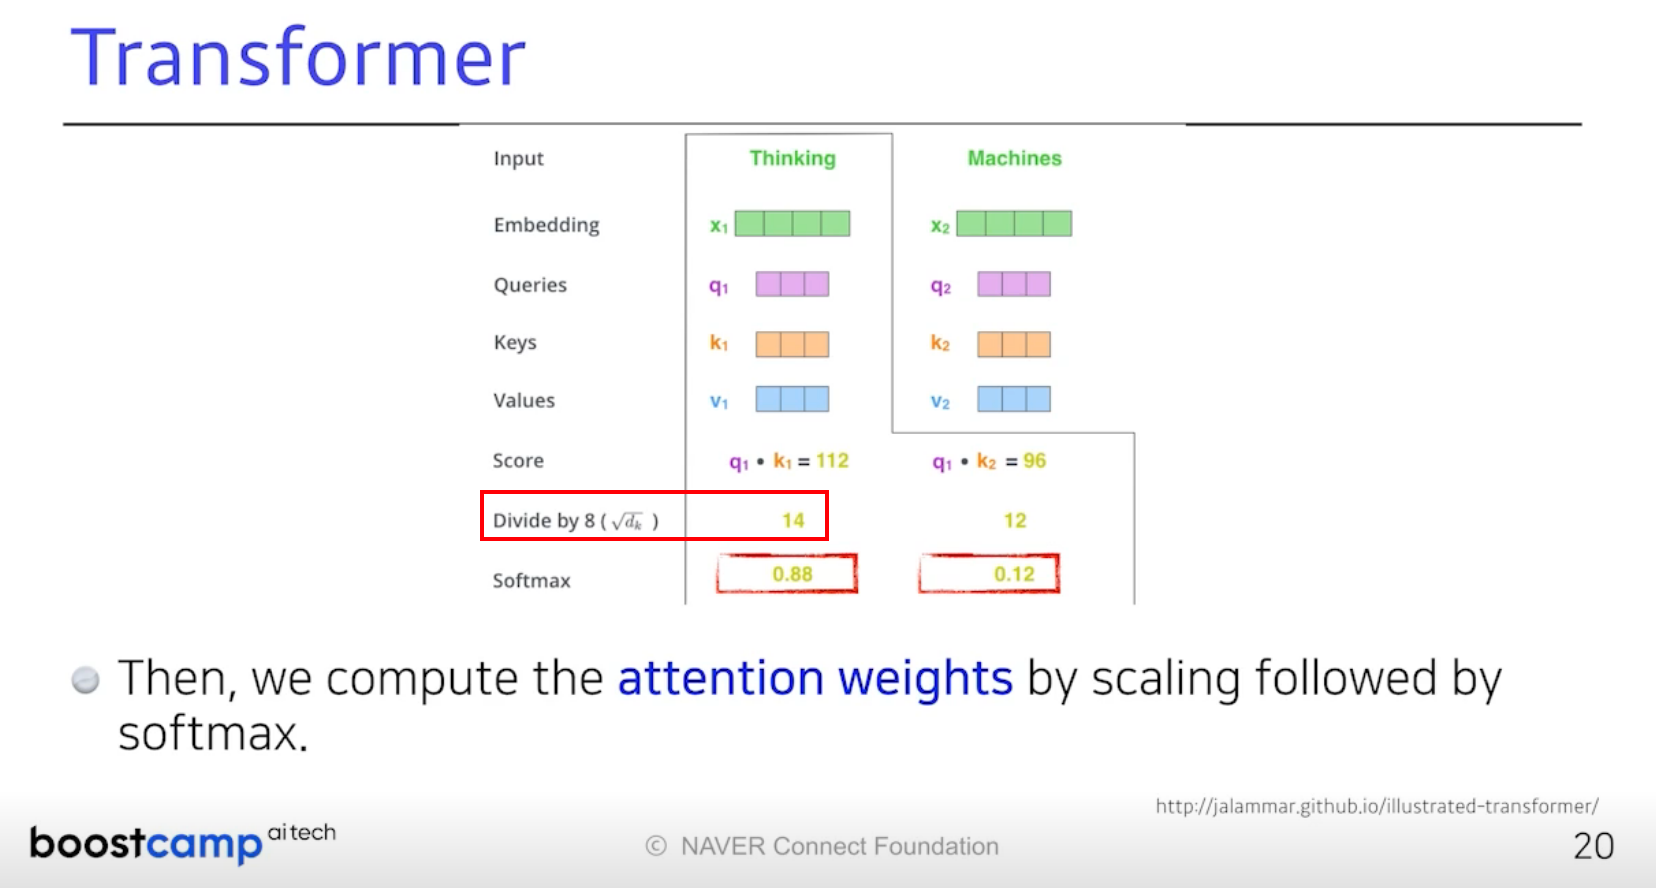
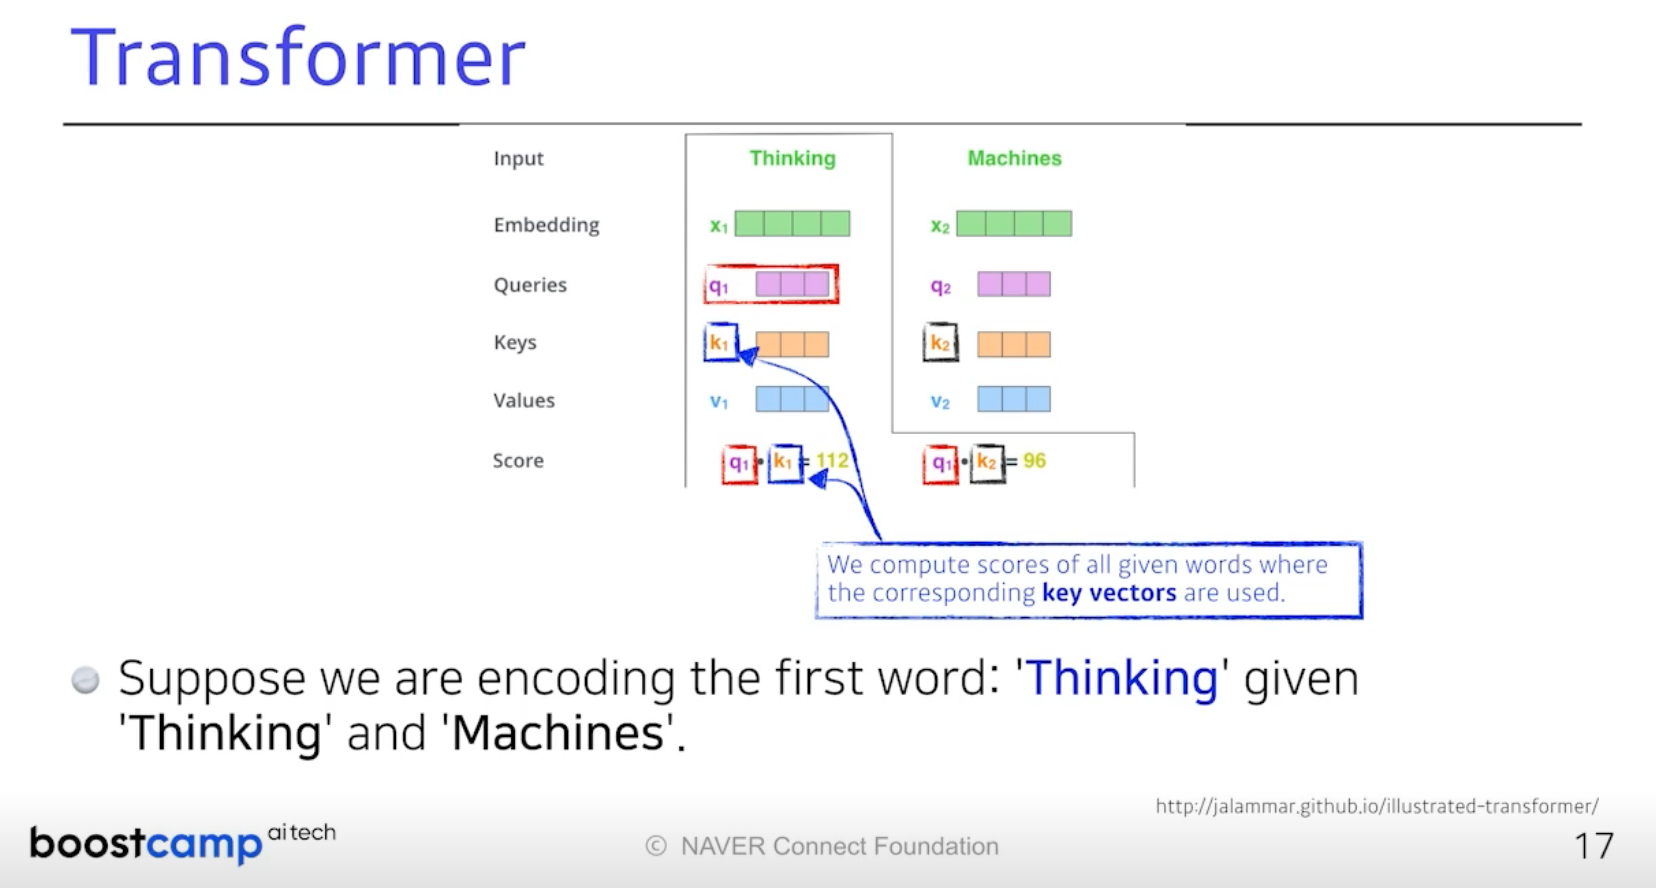

#### Encoding 연산 과정 요약
1. X(2행 4열 -> 2개의 단어, 4개의 임베딩)에 대해 Q, K, V에 따른 W(가중치 행렬)을 곱해서 각각 Q,K,V 구하기

<br>
<div>
    <img src=attachment:image.png width=800>
</div>
<br>

2. QxKt를 루트 dk로 나누어 정규화하고 Softmax함수 취한 뒤, V 곱하면 최종 결과 Z가 나온다.

<br>
<div>
    <img src=attachment:image-3.png width=800>
</div>
<br>
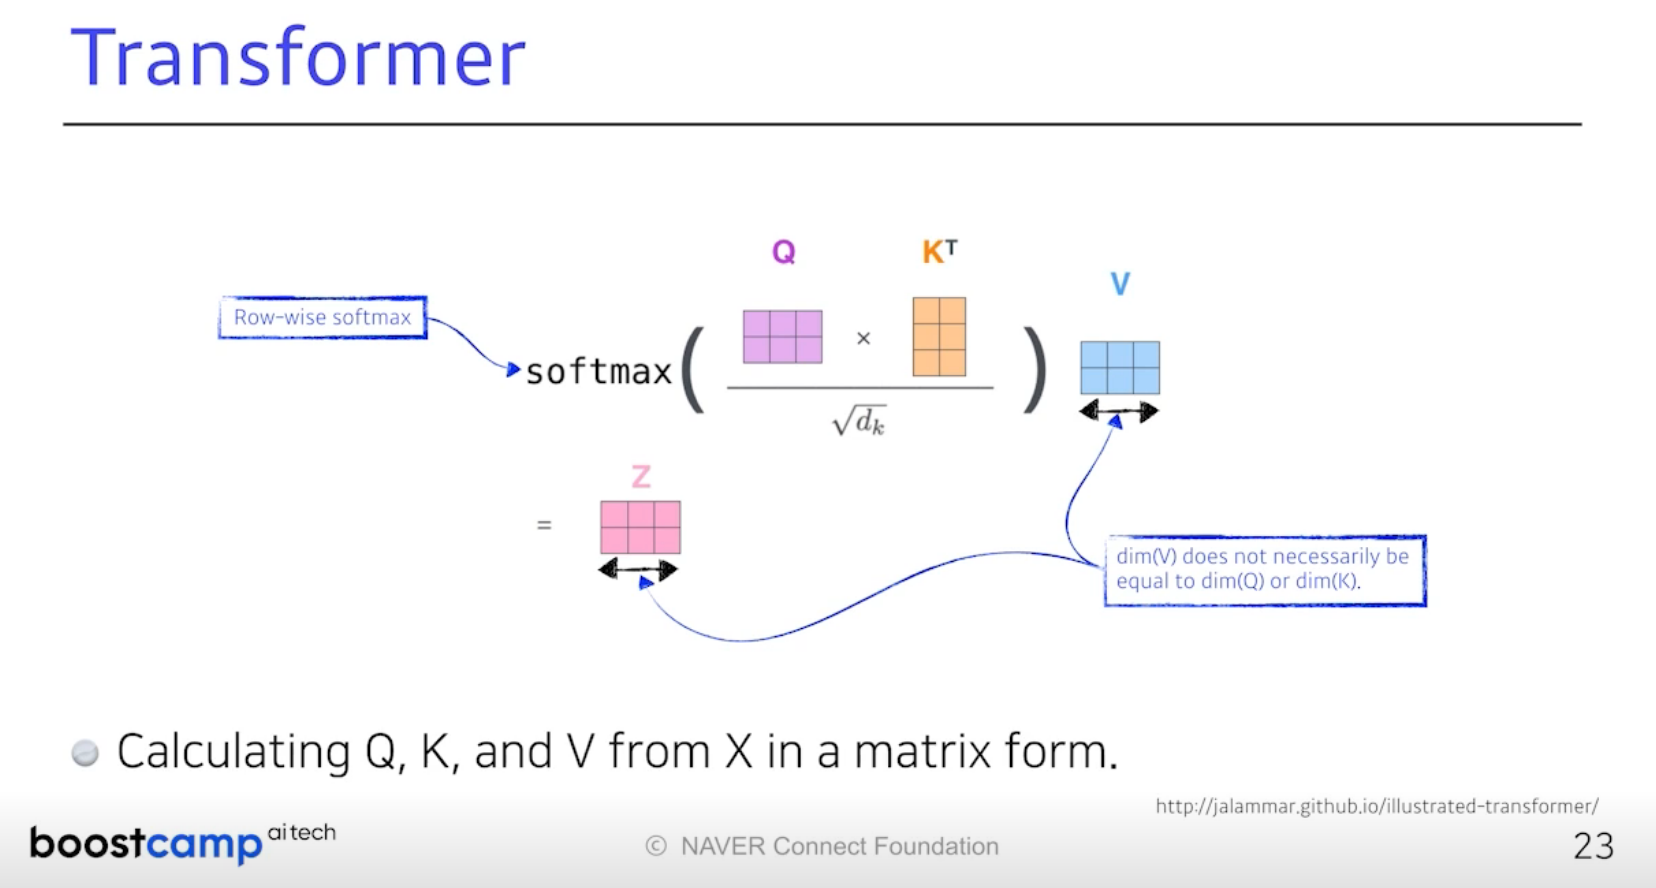
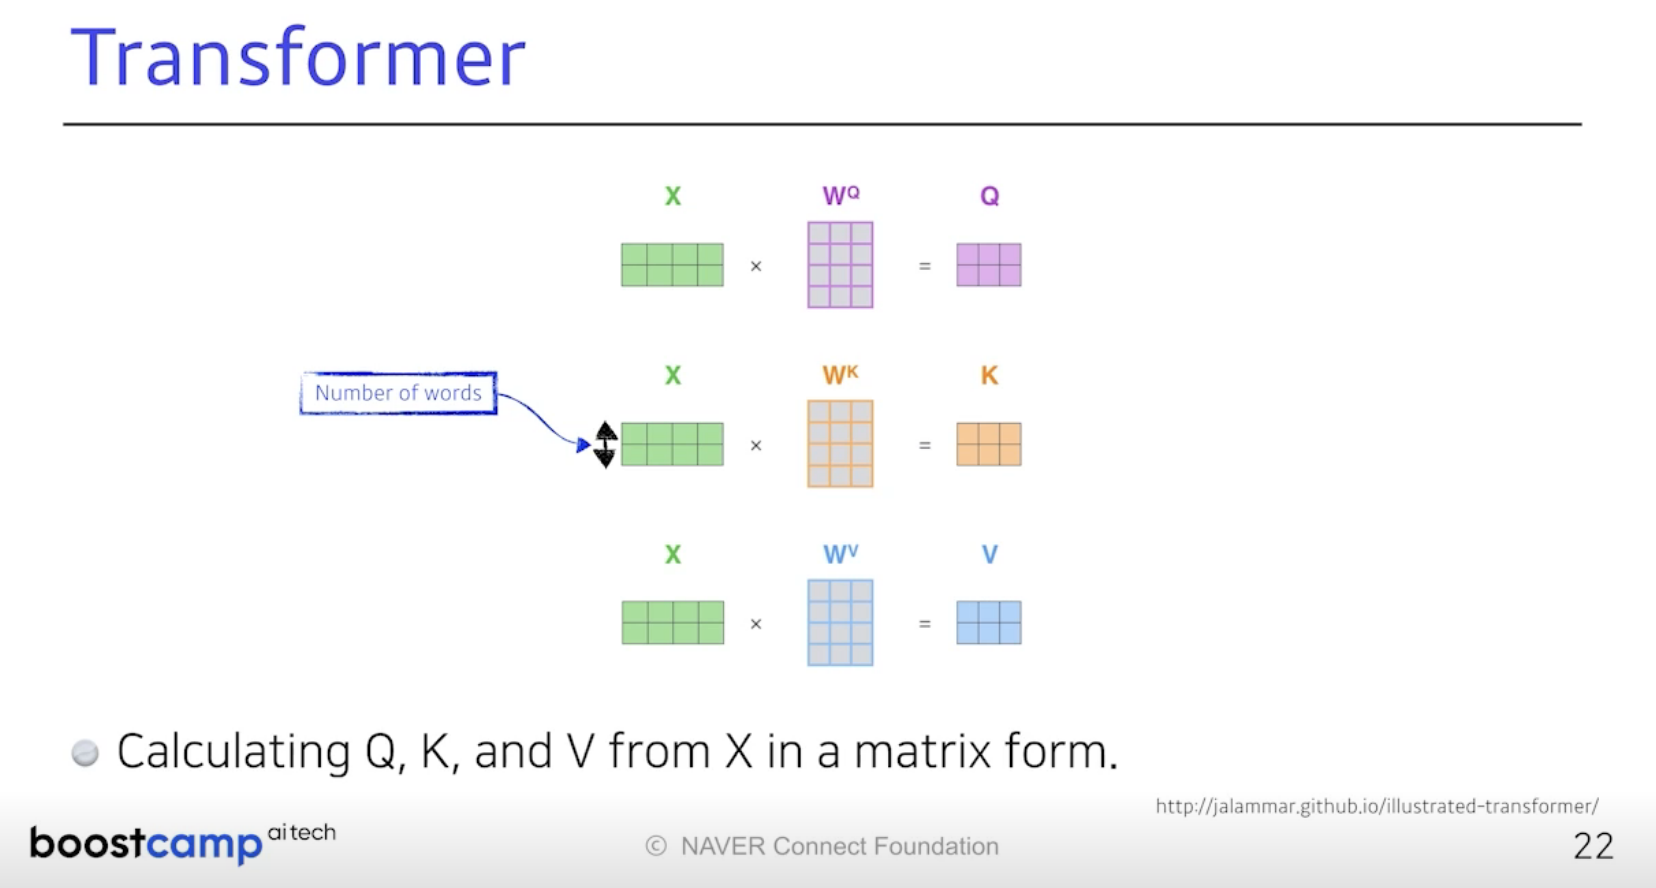

### MHA(Multi Head Attention)
지금까지 본것들은 Single Attention이다.<br>
Multi Head Attention은 Single Attention을 각 단어별로 여러번 해주는 것을 의미한다.<br>
하나의 단어에 대해 Q, K, V를 1개 만드는게 아니고, n개(단어 개수)만큼 만들고 연산하는 것이다.<br>

<br>
<div>
    <img src=attachment:image.png width=800>
</div>
<br>
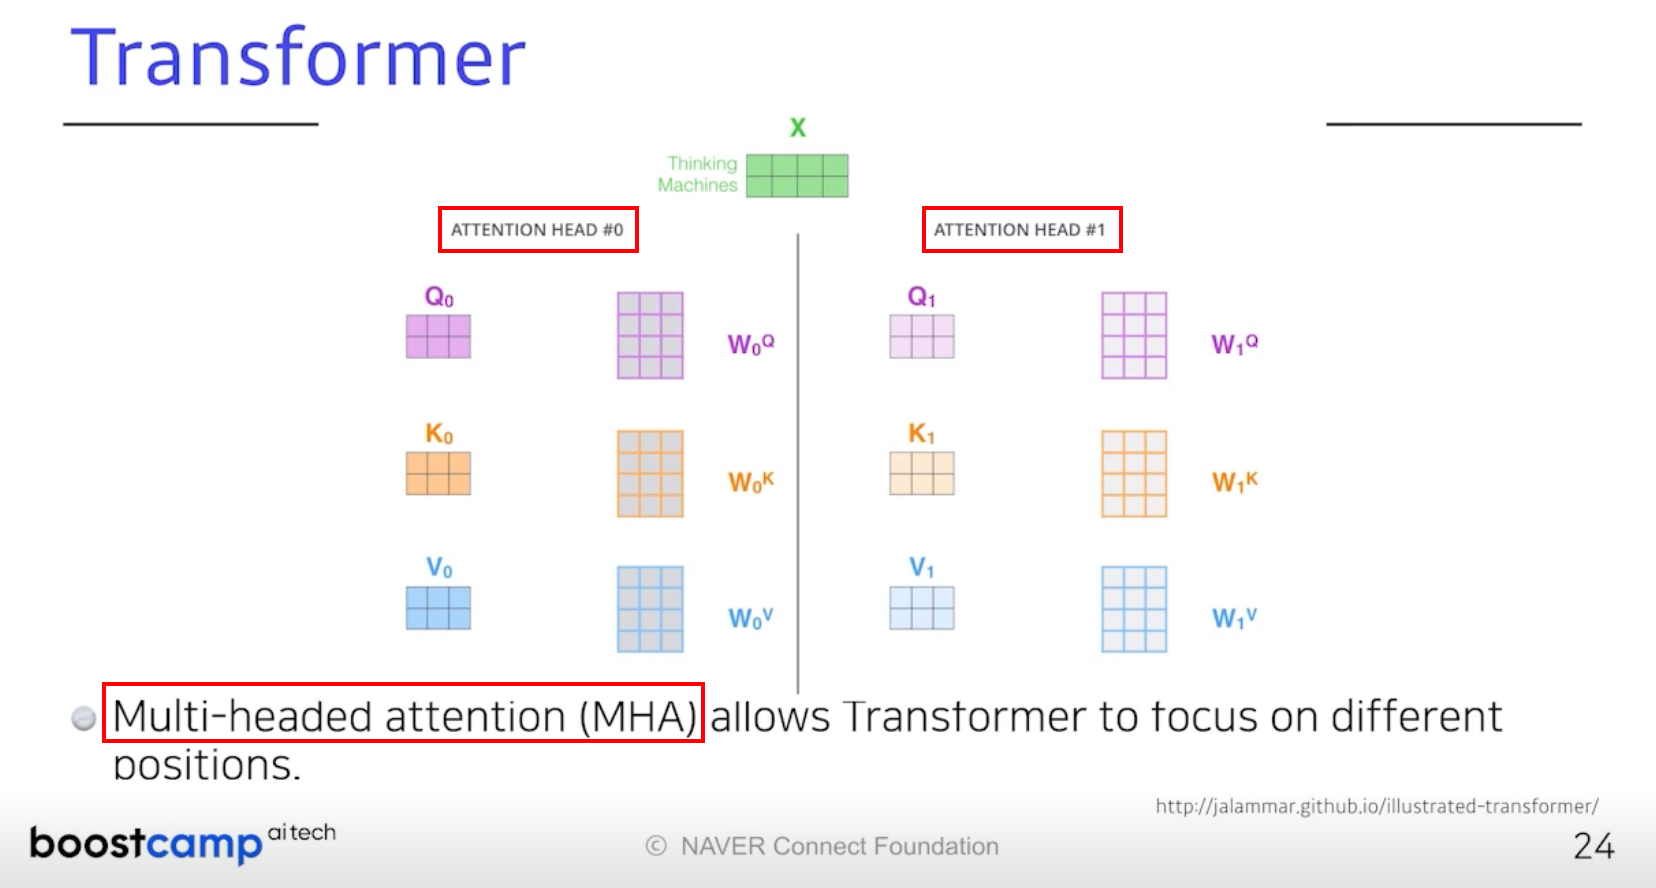

#### 8개의 헤드가 사용된 경우
8개 헤더가 사용된 경우, 8개의 서로다른 셋의 encoded vectors(Z0 ~ Z7)을 얻게된다.<br>

<br>
<div>
    <img src=attachment:image.png width=800>
</div>
<br>
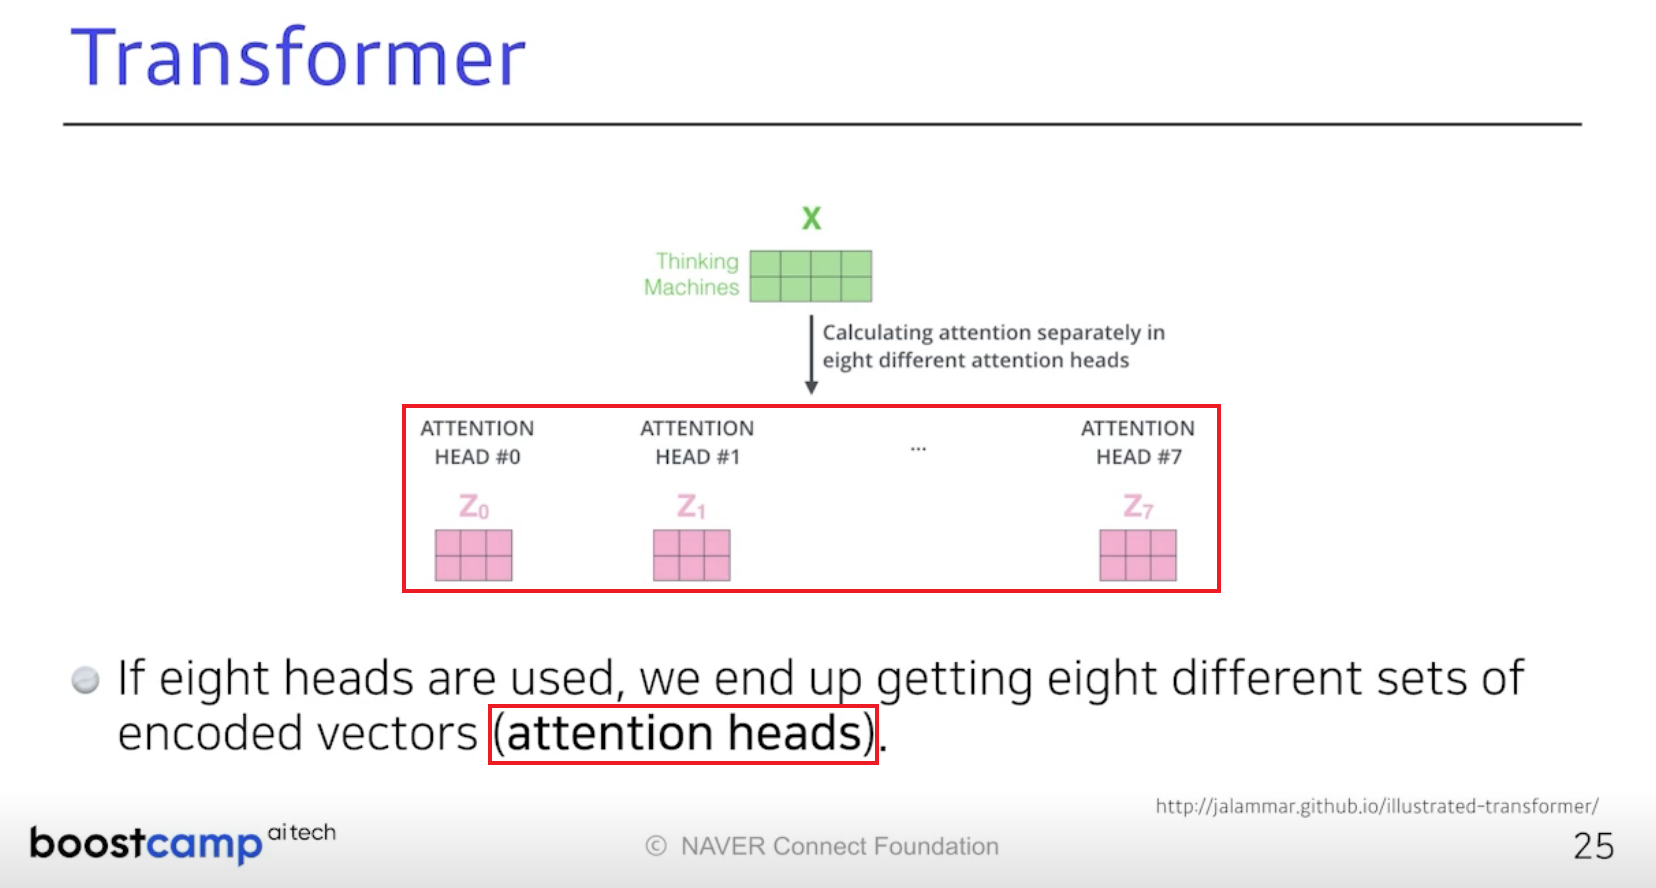

#### Positional Encoding
필요한 이유: 트랜스포머는 주어지는 단어의 순서에 independent 하다.(상관이 없다.)<br>
이유는 Self-Attention 특성상, 각 단어별로 다른 단어와의 관계를 보기때문에 순서가 바뀌어도 똑같다.<br>
그래서, 문장이나 이미지에서 각 단어의 위치, 픽셀별로 위치가 중요하기 떄문에 Positional Encoding을 해야한다.<br>
Postional Encoding은 주어진 입력에 어떤 값을 더하는 것이다.<br>

<br>
<div>
    <img src=attachment:image.png width=800>
</div>
<br>

그래서 Positional Encoding은 특정 방법으로 벡터를 만들게 된다.<br>

<br>
<div>
    <img src=attachment:image.png width=800>
</div>
<br>
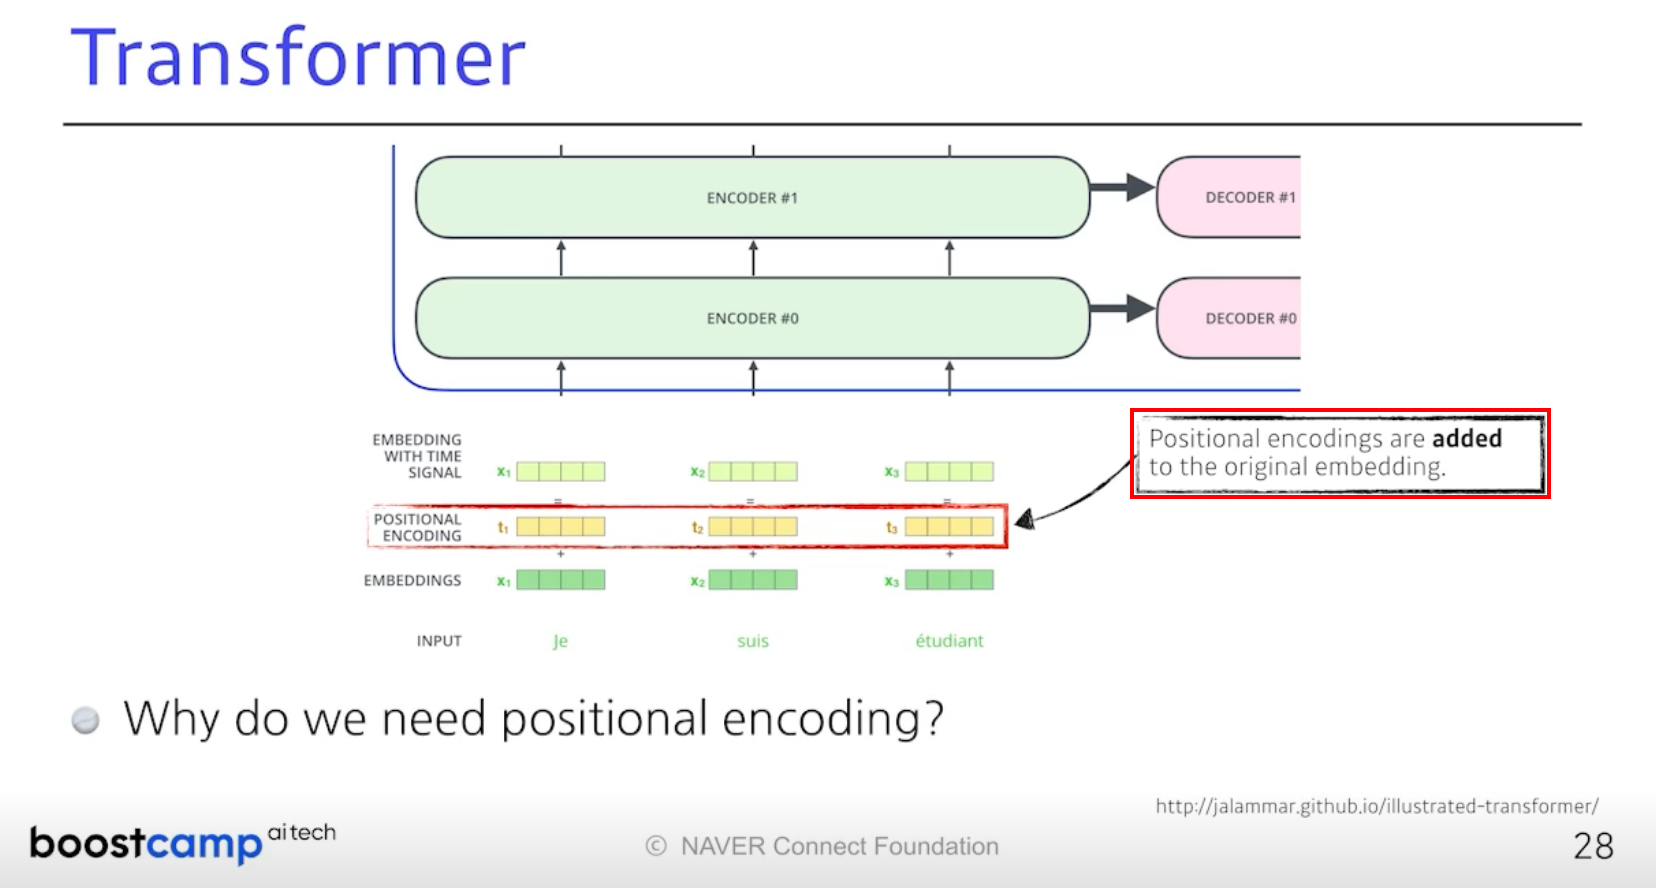

##### 512 dimension - Positional Encoding

<br>
<div>
    <img src=attachment:image.png width=800>
</div>
<br>
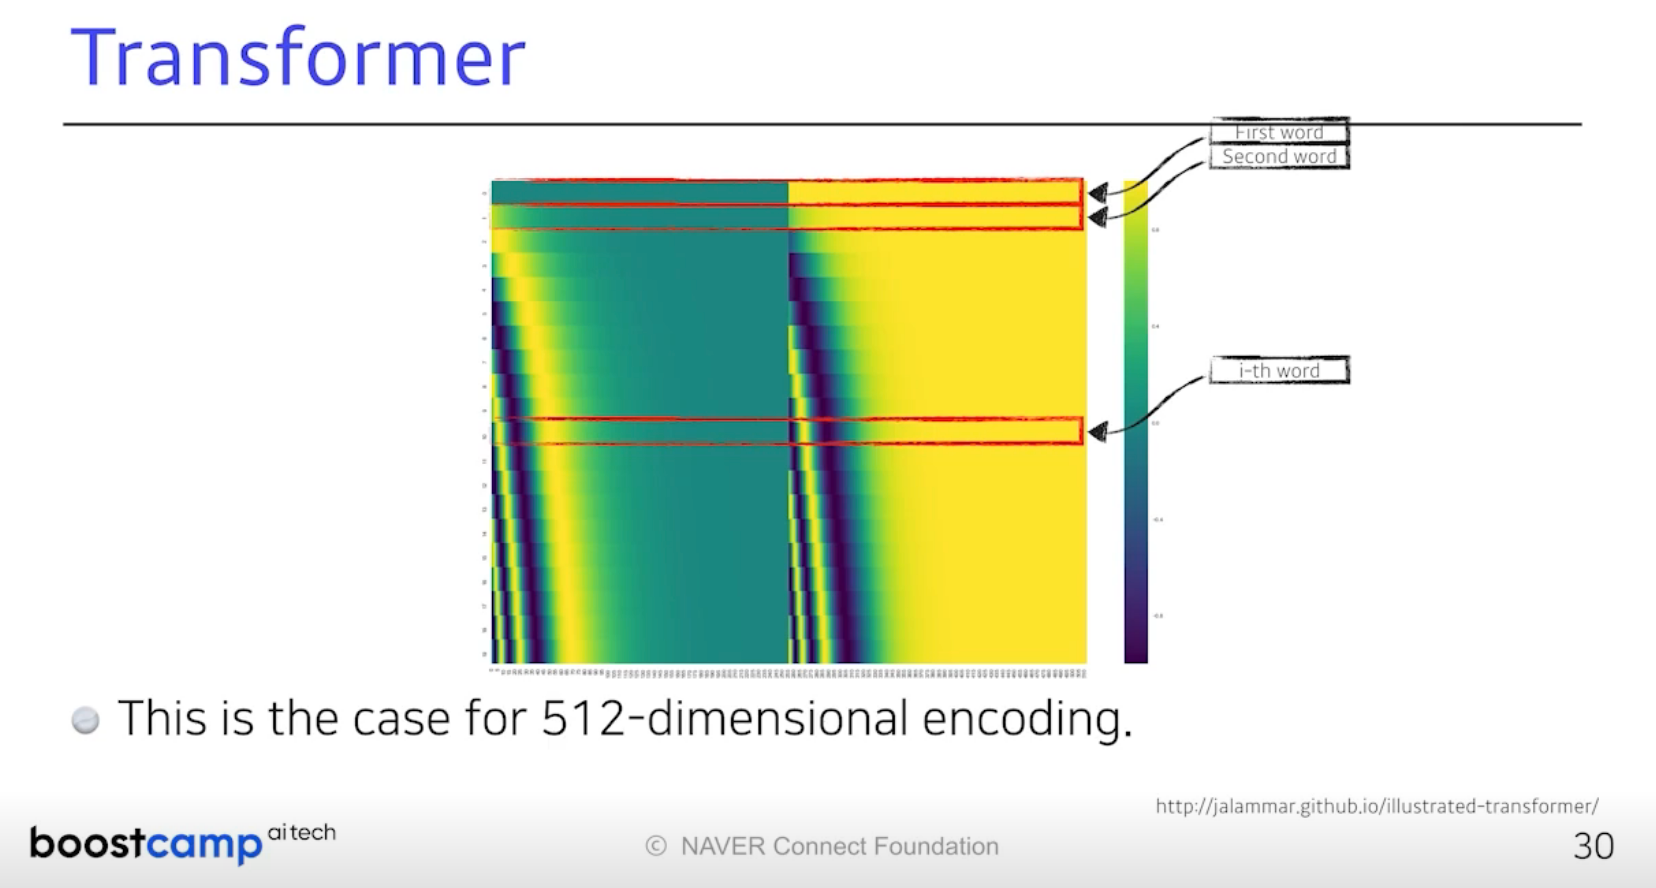

### Transformer 간단 개요
n개의 단어가 주어지면, 인코딩된 n개의 벡터가 나오고,<br>
주의할 점은 i번째 단어를 인코딩할 때는, 나머지 n개의 모든 입력들의 정보를 활용해서 해당 단어를 인코딩한다는 것!<br>
<br>
<div>
    <img src=attachment:image.png width=800>
</div>
<br>
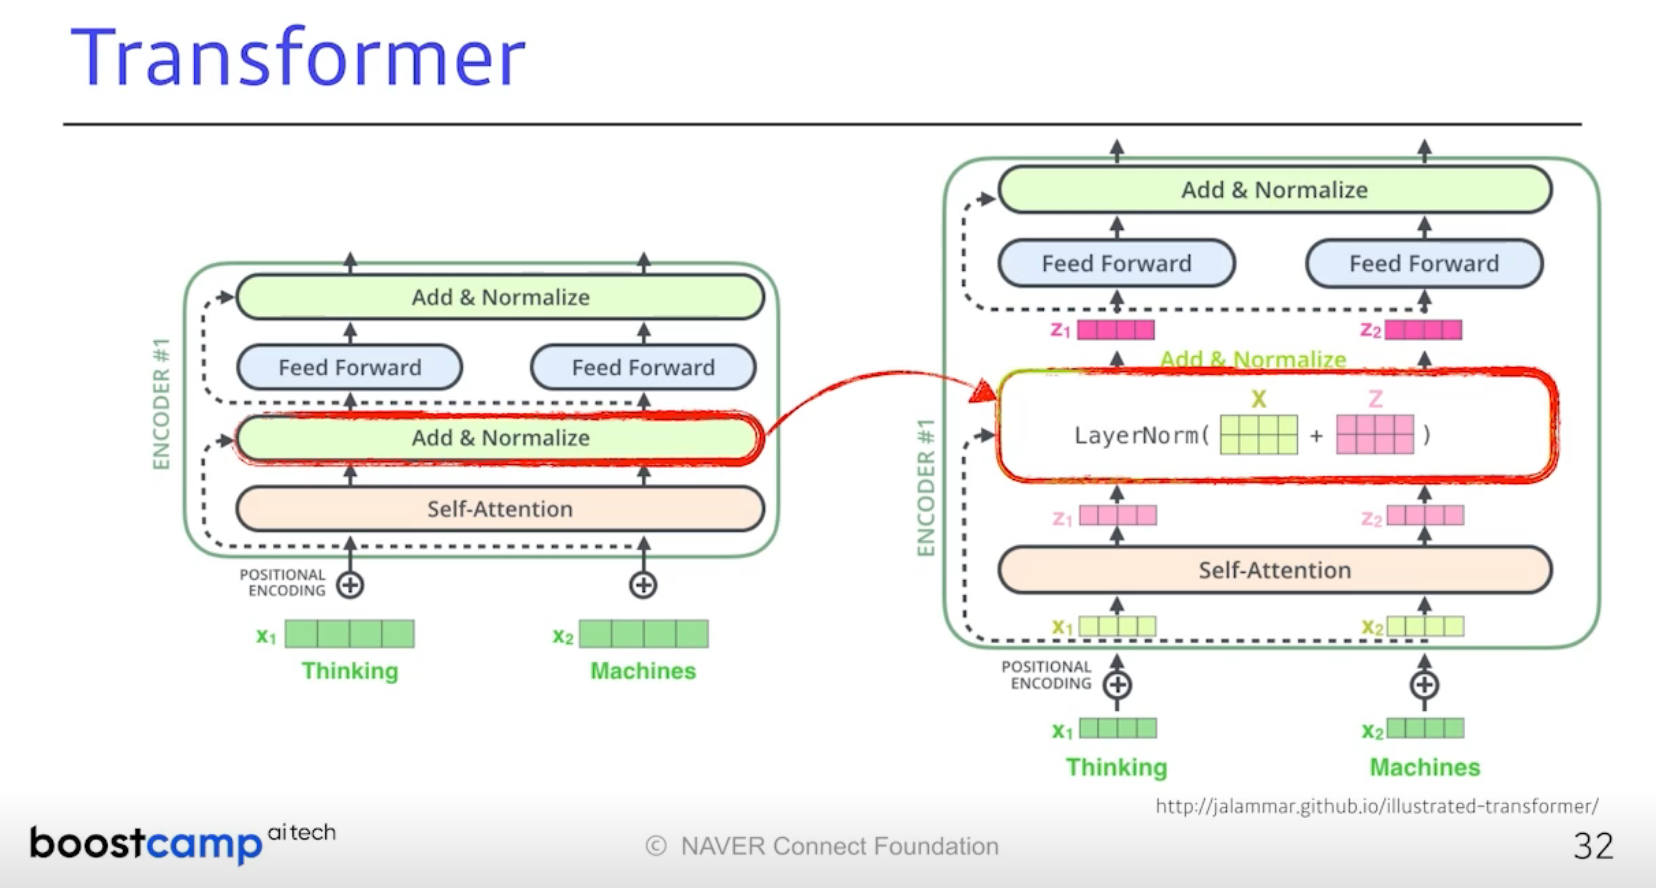

### 인코더 -> 디코더
인코더는 주어진 단어를 벡터로 표현하는 거였고, 디코더는 그걸가지고 뭔가를 생성하는 것이다.<br>
중요한 점은, 인코더에서 디코더로 어떤 정보가 전해지는지가 중요하다.<br>
그것은 바로, Key와 Value 벡터를 디코더에 보내는 것이다.<br>

<br>
<div>
    <img src=attachment:image.png width=800>
</div>
<br>

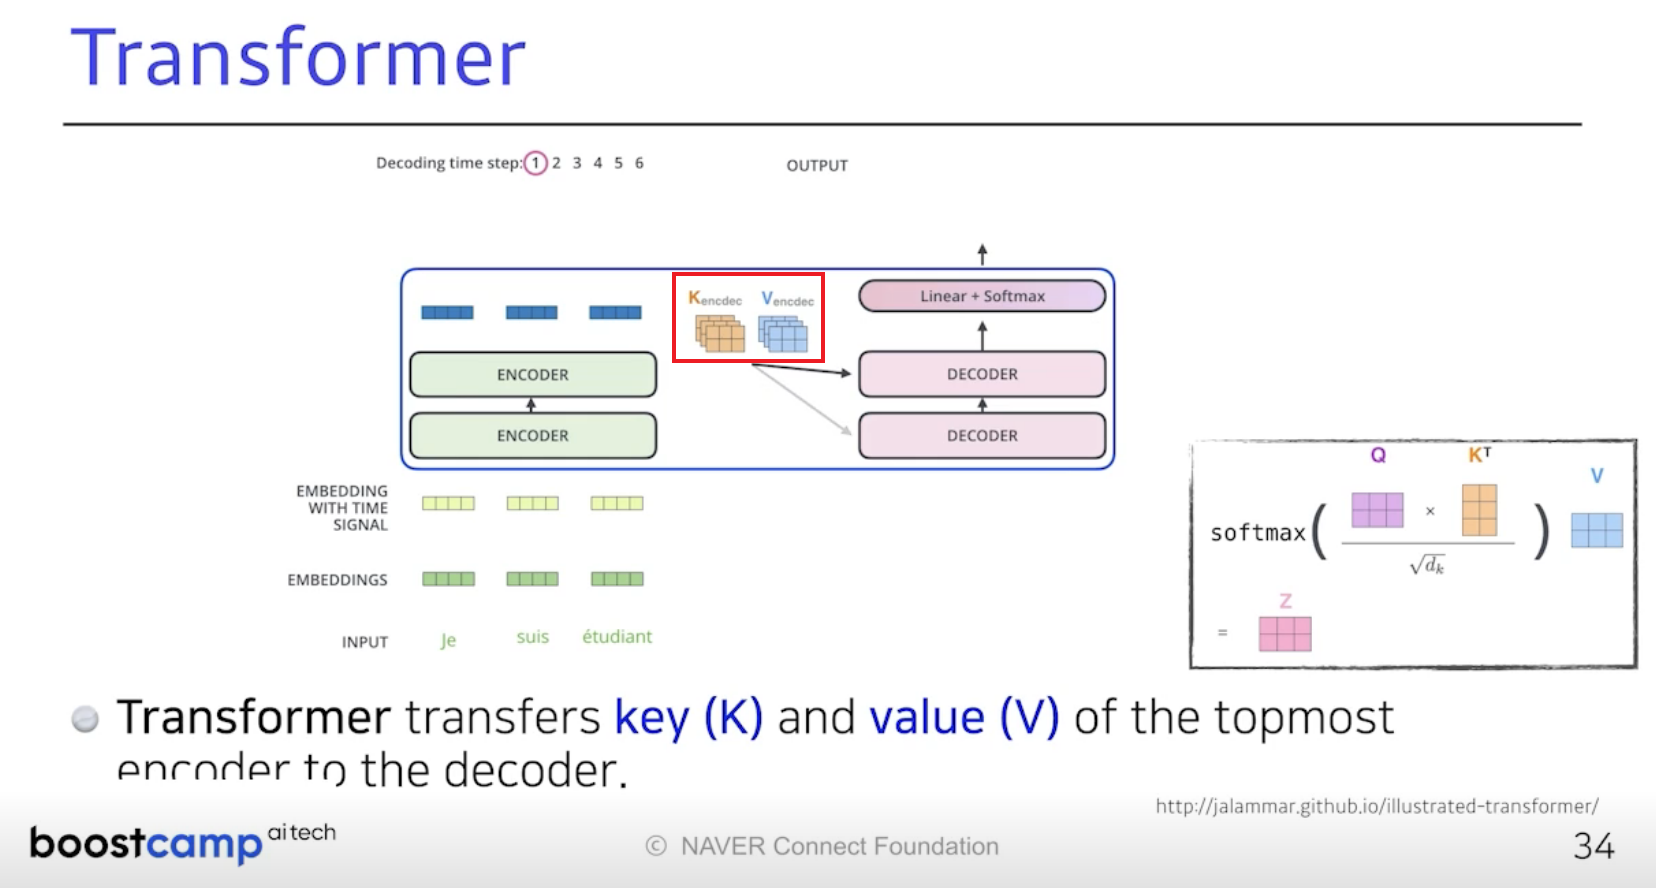

### 학습 단계
학습할 땐, 데이터와 라벨을 모두 아는 상태이기 때문에, Self-Attention Layer에서 future 포지션을 마스킹해서 학습하게 된다.<br>
그러면, input에서는 현재 포지션까지만 입력이 있기 때문에, 정답을 모르는채로 학습하게 된다.<br>
<br>
<div>
    <img src=attachment:image.png width=800>
</div>
<br>
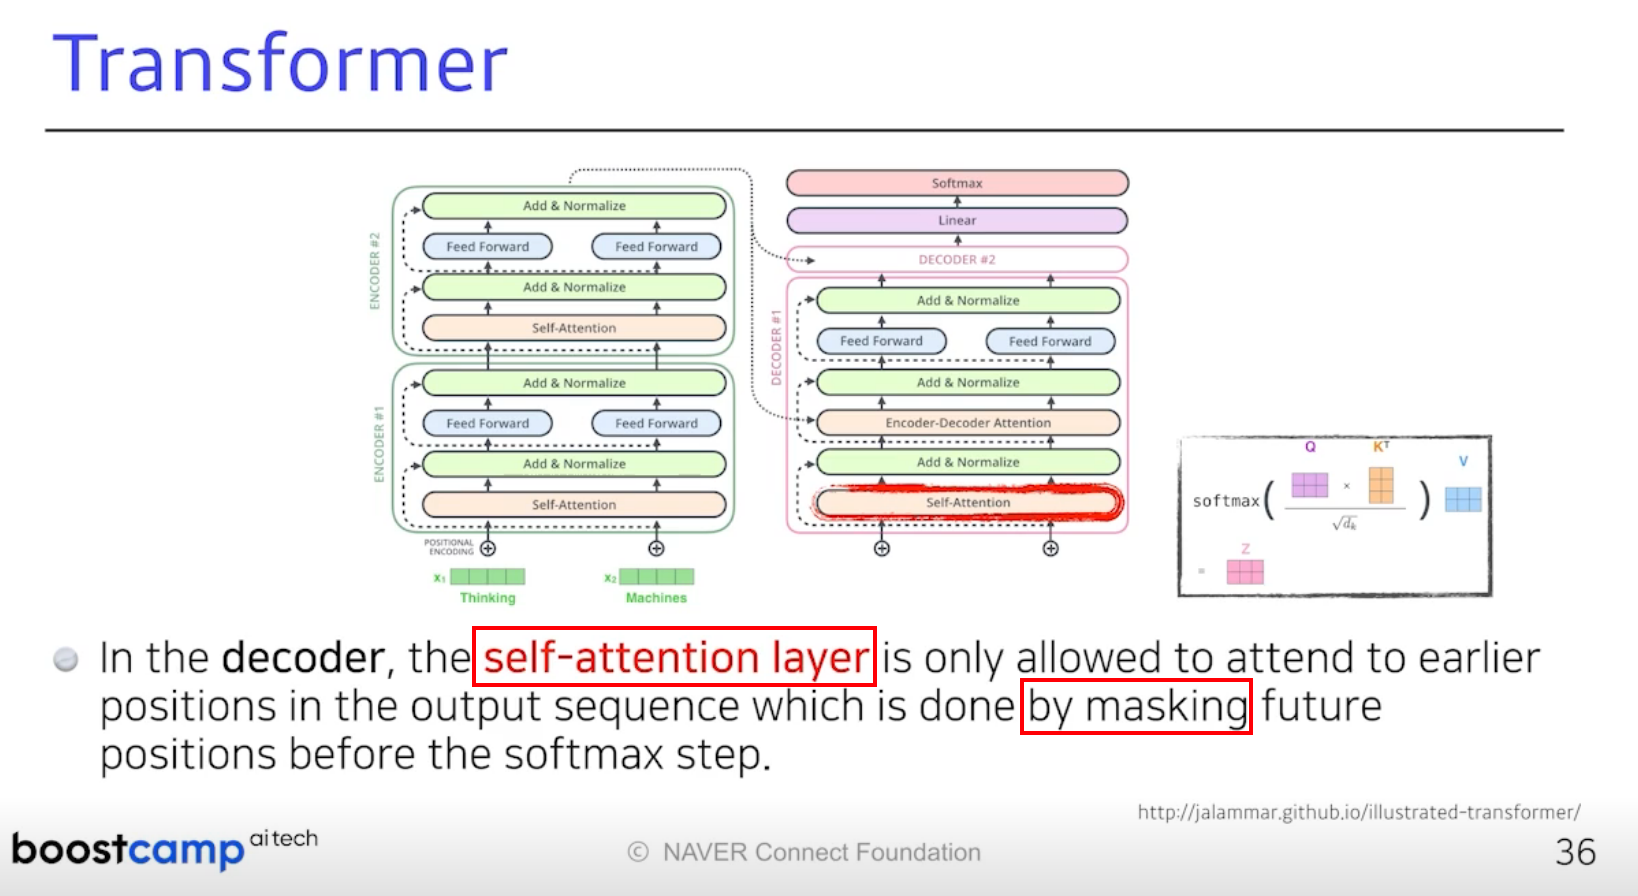

### Encoder-Decoder Attention
디코더는 encoder 스택에서 만들어진 Keys, Values를 받는다.
<br>
<div>
    <img src=attachment:image.png width=800>
</div>
<br>
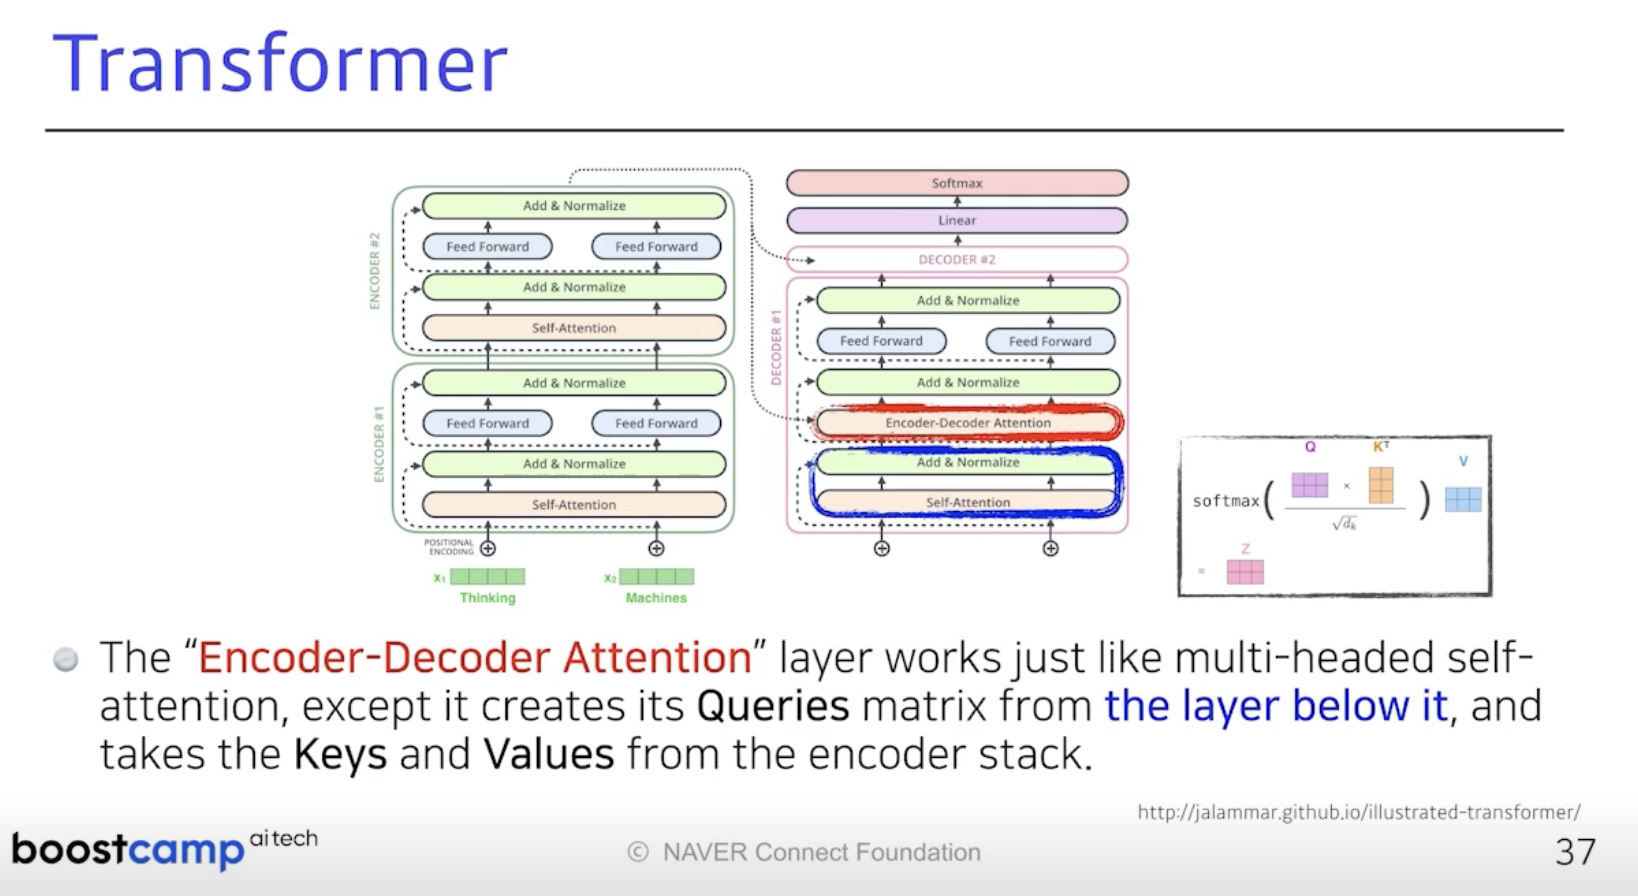